# **Data Visualization**

**Imports**

In [39]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr
from tabulate import tabulate
import matplotlib.patches as mpatches

Saving City_Region_Socioeconomic_Level_.csv to City_Region_Socioeconomic_Level_ (1).csv
Saving Region_Obesity_Level_.csv to Region_Obesity_Level_ (1).csv
Saving TheR_Regions_Rate_Last.csv to TheR_Regions_Rate_Last (1).csv


In [17]:
import warnings
warnings.filterwarnings('ignore')

**Obesity Data on Regions**

<ipython-input-3-b6cf923e08a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Rate', data=obesity_data, palette='plasma')


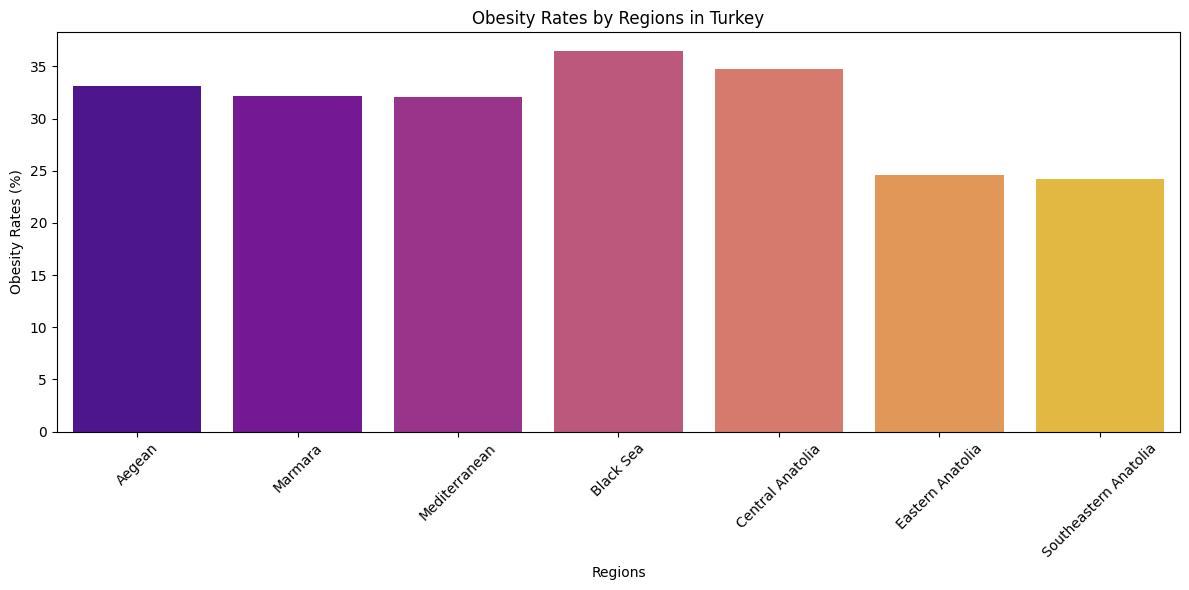

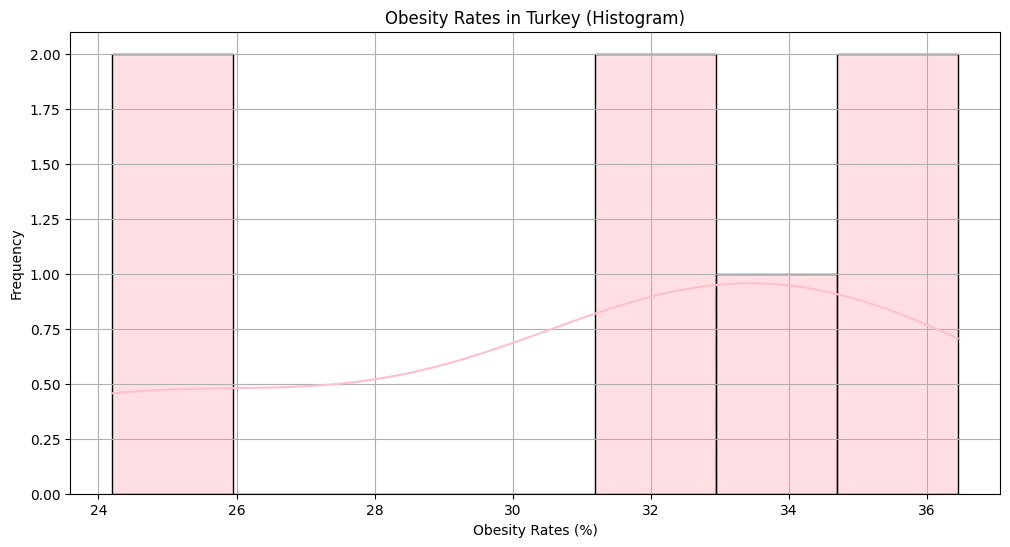

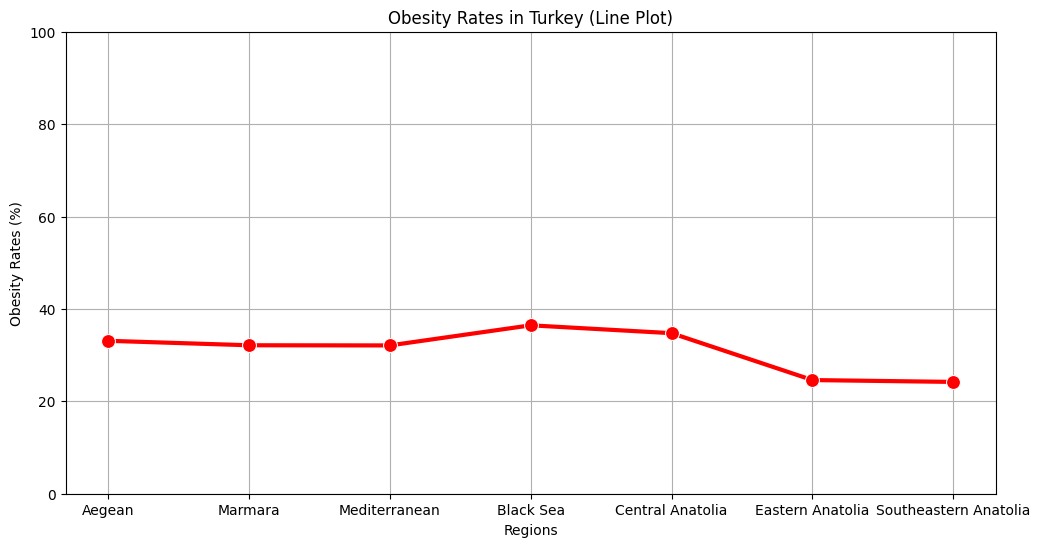

In [3]:
obesity_data = pd.read_csv("/content/Region_Obesity_Level_.csv", delimiter=';')

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Rate', data=obesity_data, palette='plasma')
plt.title("Obesity Rates by Regions in Turkey")
plt.xlabel("Regions")
plt.ylabel("Obesity Rates (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(" ")
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(obesity_data['Rate'], bins=7, kde=True, color='pink')
plt.title("Obesity Rates in Turkey (Histogram)")
plt.xlabel("Obesity Rates (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(" ")
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=obesity_data[['Region', 'Rate']],
    x='Region',
    y='Rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
)
plt.title("Obesity Rates in Turkey (Line Plot)")
plt.xlabel("Regions")
plt.ylabel("Obesity Rates (%)")
plt.grid(True)
plt.ylim(0,100)
plt.show()


**City Data**

There are 6 levels of socioeconomic status. Class 1 is presenting the highest socioeconomic level, and class 6 is presenting the lowest socioeconomic level.

To find the regions' socioeconomic level; first I have calculated cities' socioeconomic level , then I have combined and calculated the regions socioeconomic level with making the cities as groups.

The calculation of one specific city's socioeconomic level:

	Score of Rates = 6*Rate Class 1 + 5*Rate Class 2 + 4*Rate Class 3 + 3*Rate Class 4 + 2*Rate Class 5 + 1*Rate Class 1

  since I am calculating a score (not rate at this point), I needed to give the highest point to the highest socioeconomic level class

	RATE = Score of Rates / 6
  since there are 6 classes

Later, I have calculated the regions' rate with adding the score of every city that the region contains, then divided the score to 6*number of cities.

Additionaly, I have added the data which contains the answer to the question "Is the city nearby the sea?".

With these steps, I have cleaned and organized my data.

<ipython-input-4-af4bf53e13af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='RATE', data=city_data, palette='magma')


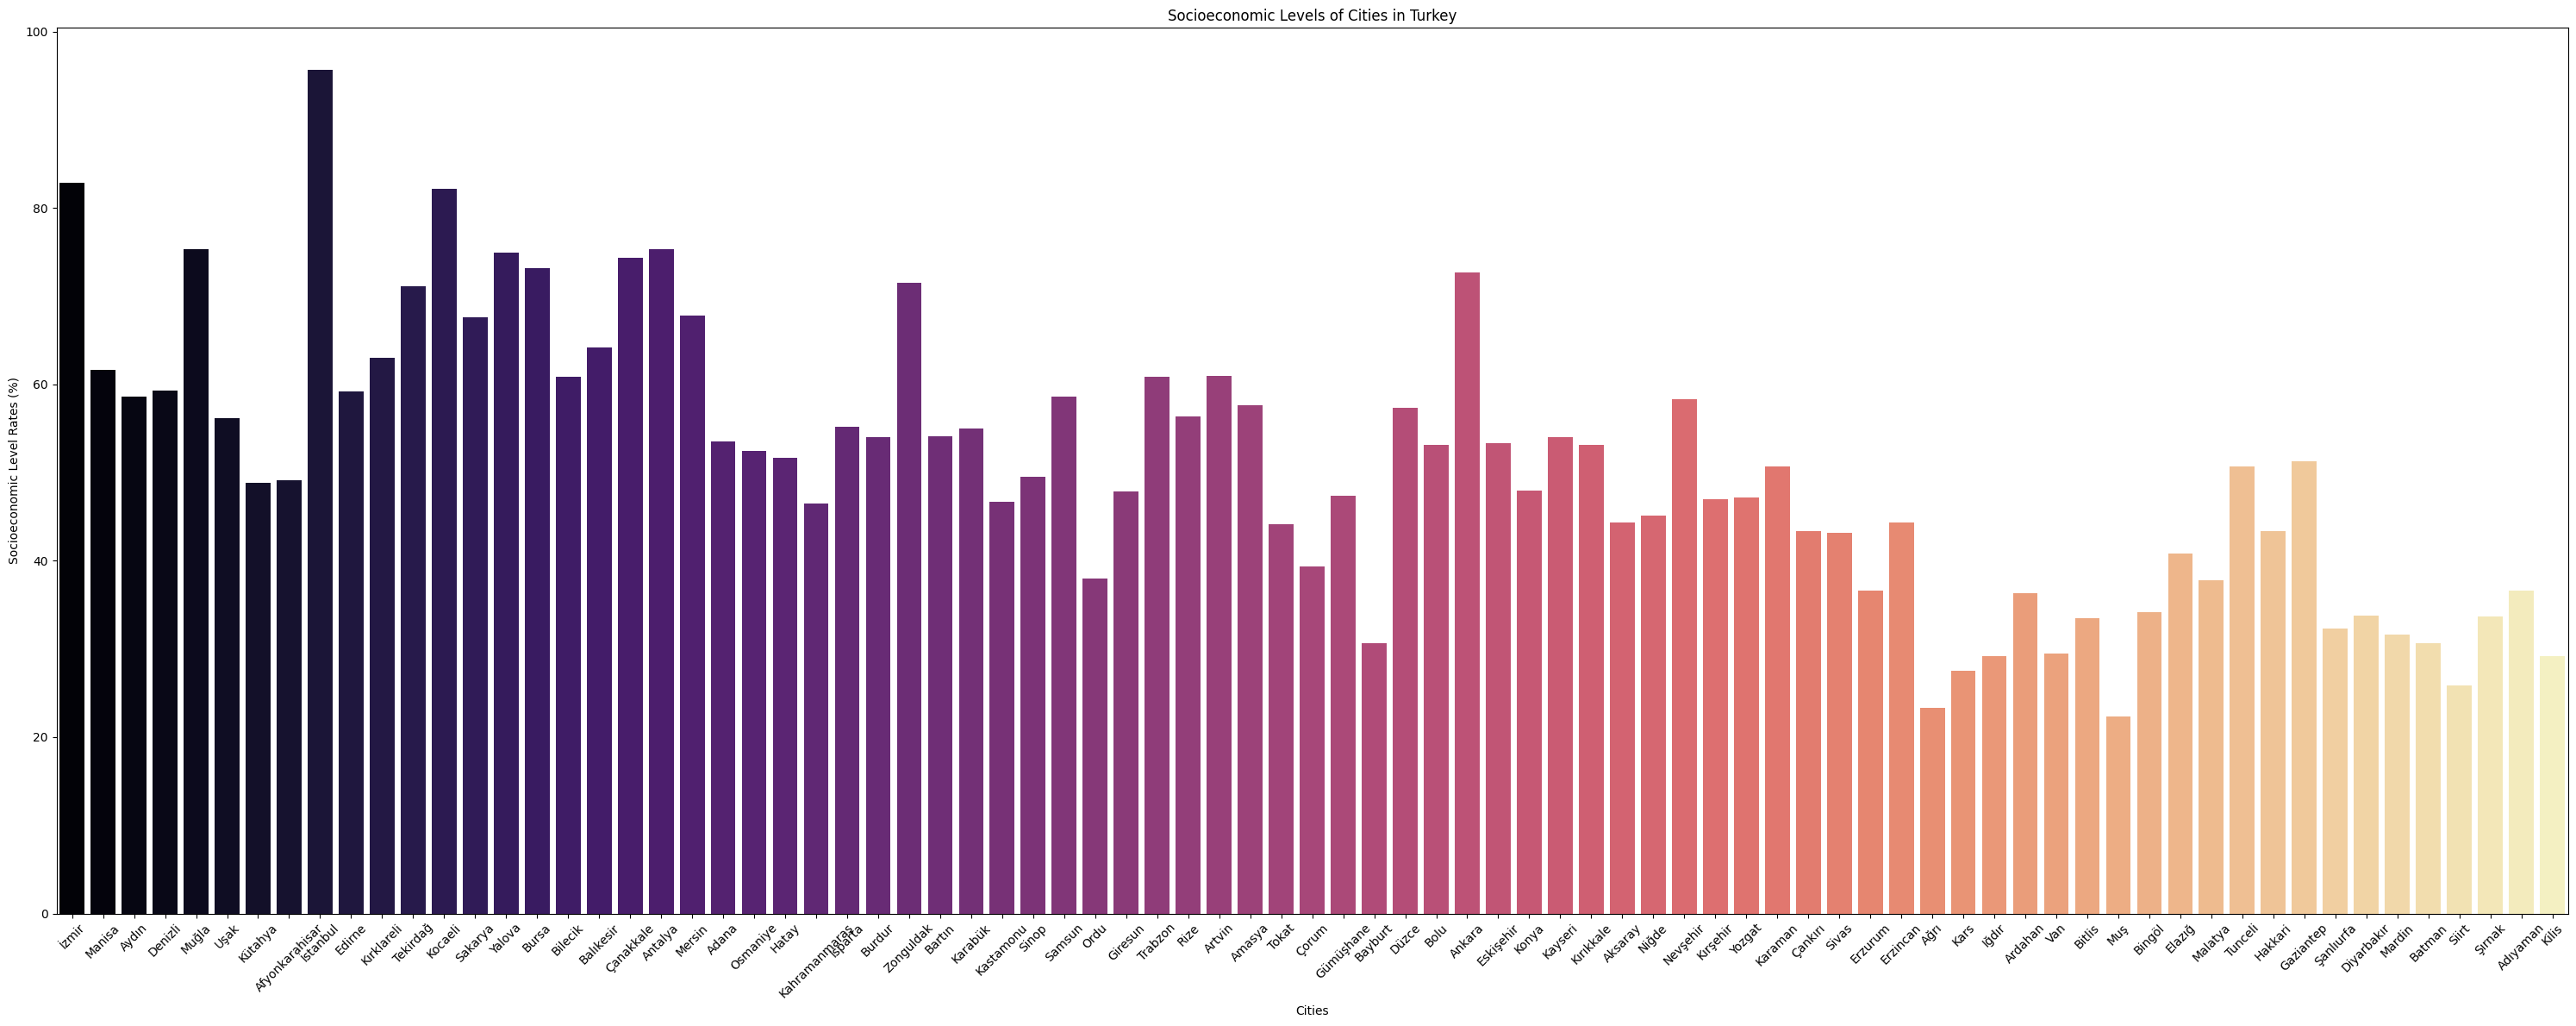

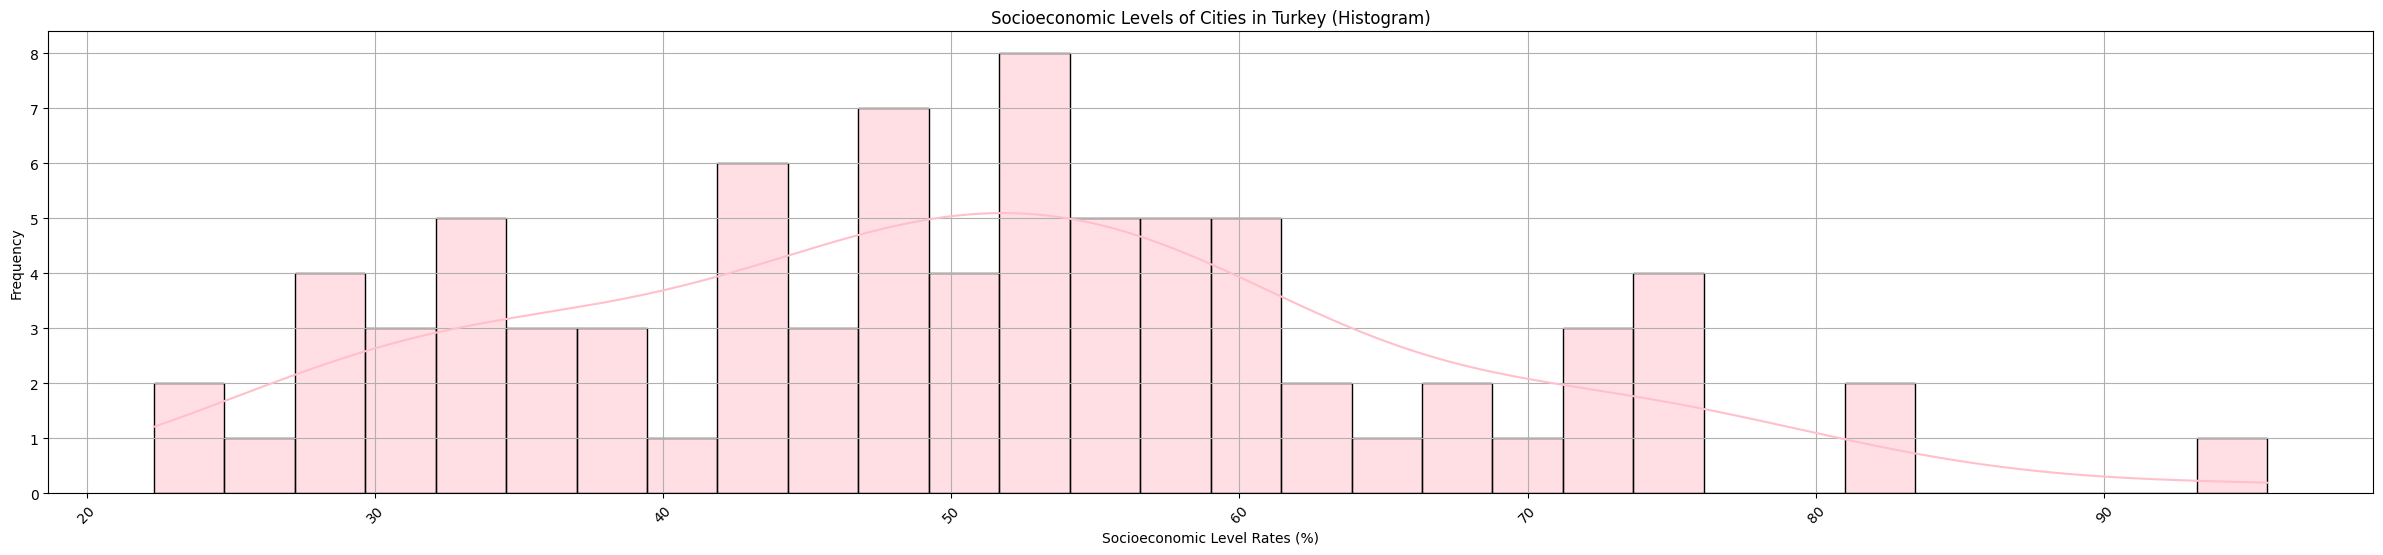

In [4]:
city_data = pd.read_csv("/content/City_Region_Socioeconomic_Level_.csv", delimiter=';', decimal=",")

# Bar Chart -> for socioeconomic levels
plt.figure(figsize=(30, 12))
sns.barplot(x='City', y='RATE', data=city_data, palette='magma')
plt.title("Socioeconomic Levels of Cities in Turkey")
plt.xlabel("Cities")
plt.ylabel("Socioeconomic Level Rates (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(" ")
# Histogram -> for socioeconomic levels
plt.figure(figsize=(30, 6))
sns.histplot(city_data['RATE'], bins=30, kde=True, color='pink')
plt.title("Socioeconomic Levels of Cities in Turkey (Histogram)")
plt.xlabel("Socioeconomic Level Rates (%)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

City Data with Coast

<ipython-input-5-80c9507e273e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=city_data, palette='cividis')


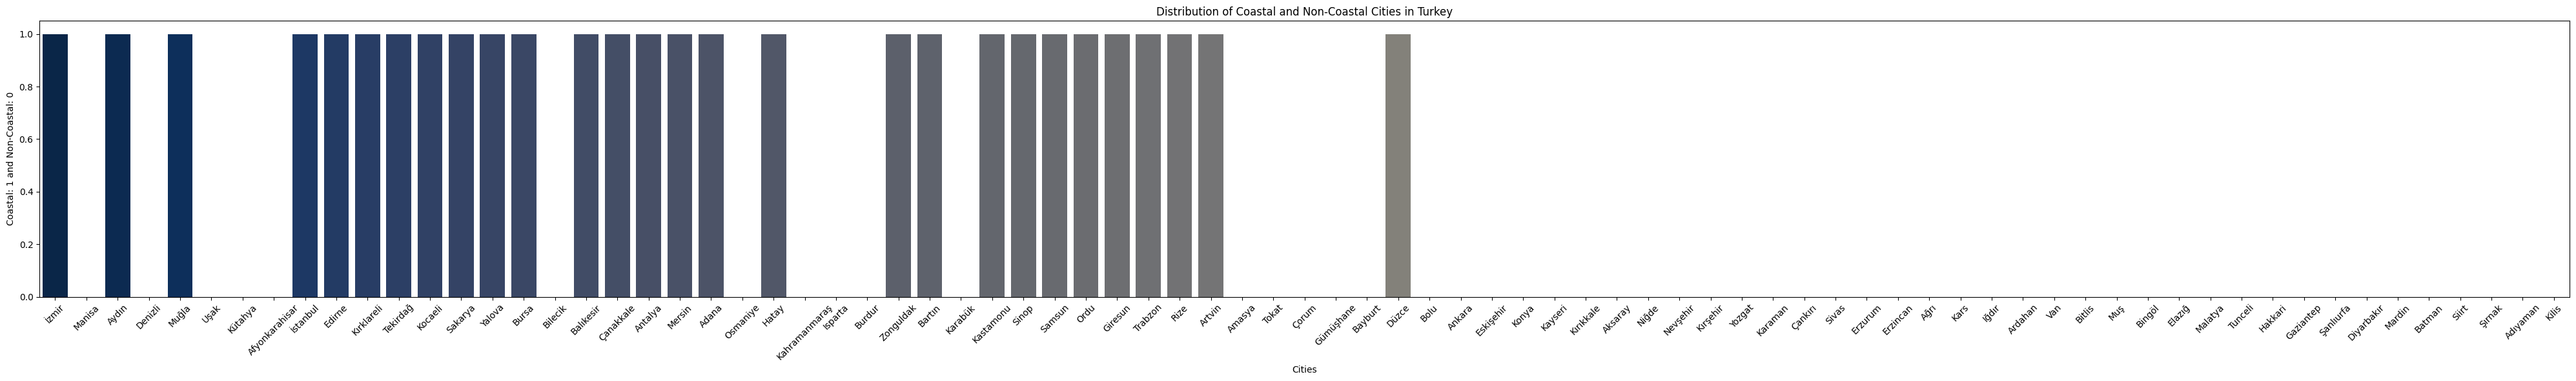

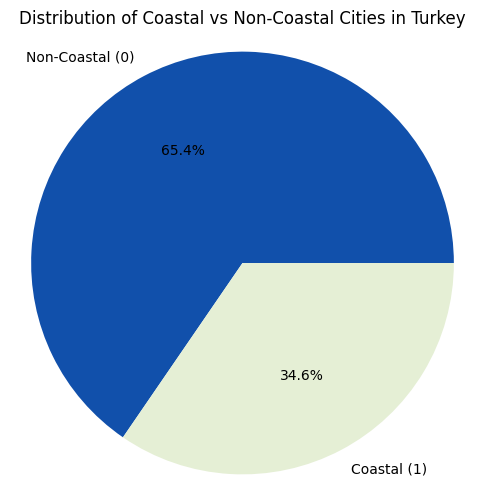

In [5]:
# Bar Chart -> for nearby sea or not
plt.figure(figsize=(40, 6))
sns.barplot(x='City', y='Sea', data=city_data, palette='cividis')
plt.title("Distribution of Coastal and Non-Coastal Cities in Turkey")
plt.xlabel("Cities")
plt.ylabel("Coastal: 1 and Non-Coastal: 0")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(" ")
# Pie Chart -> for nearby sea or not
sea_counts = city_data['Sea'].value_counts()
labels = ['Non-Coastal (0)', 'Coastal (1)']
colors = ['#1150ab', '#e5efd5']
plt.figure(figsize=(6, 6))
plt.pie(sea_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Coastal vs Non-Coastal Cities in Turkey')
plt.axis('equal')
plt.show()

**Region Data with Socioeconomic Status**

<ipython-input-6-30e8dd30ceea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Rate', data=region_data, palette='muted')


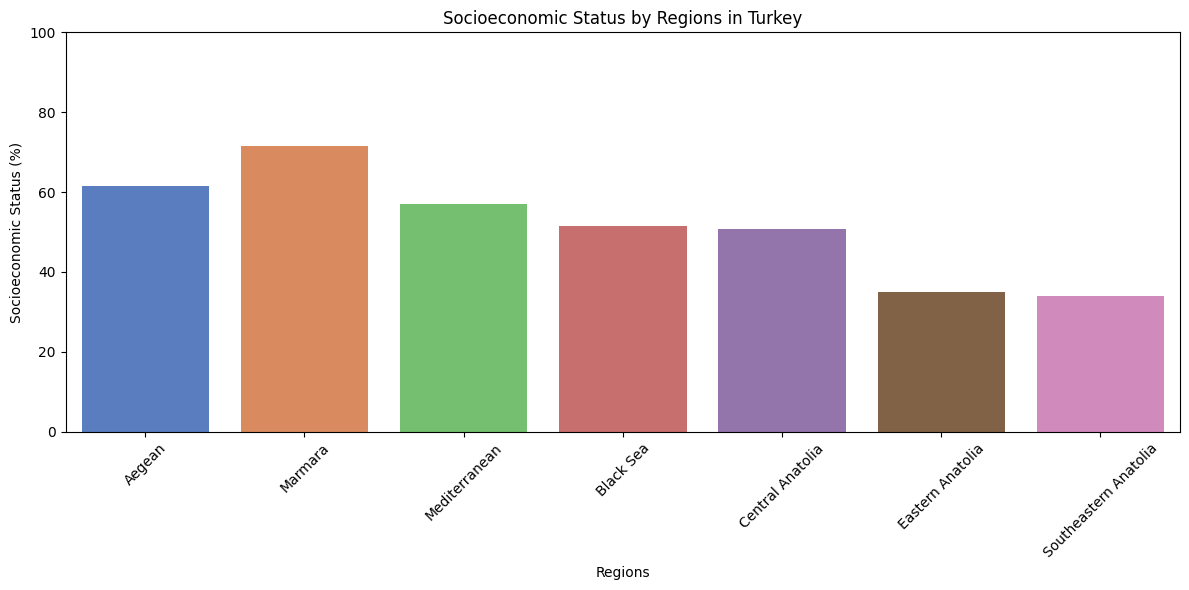

<ipython-input-6-30e8dd30ceea>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(region_data['Rate'], bins=7, kde=True, palette='bright')


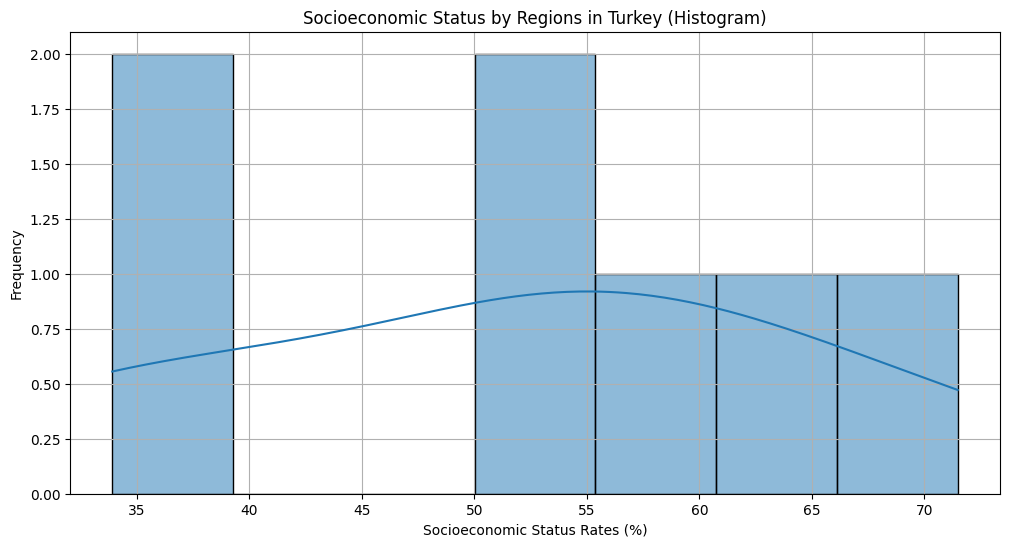

In [6]:
region_data = pd.read_csv("/content/TheR_Regions_Rate_Last.csv", delimiter=';', decimal=".")

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Rate', data=region_data, palette='muted')
plt.title("Socioeconomic Status by Regions in Turkey")
plt.xlabel("Regions")
plt.ylabel("Socioeconomic Status (%)")
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.tight_layout()
plt.show()

print(" ")
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(region_data['Rate'], bins=7, kde=True, palette='bright')
plt.title("Socioeconomic Status by Regions in Turkey (Histogram)")
plt.xlabel("Socioeconomic Status Rates (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Total Sea Count Based on Regions**

<ipython-input-7-7466517beabe>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")


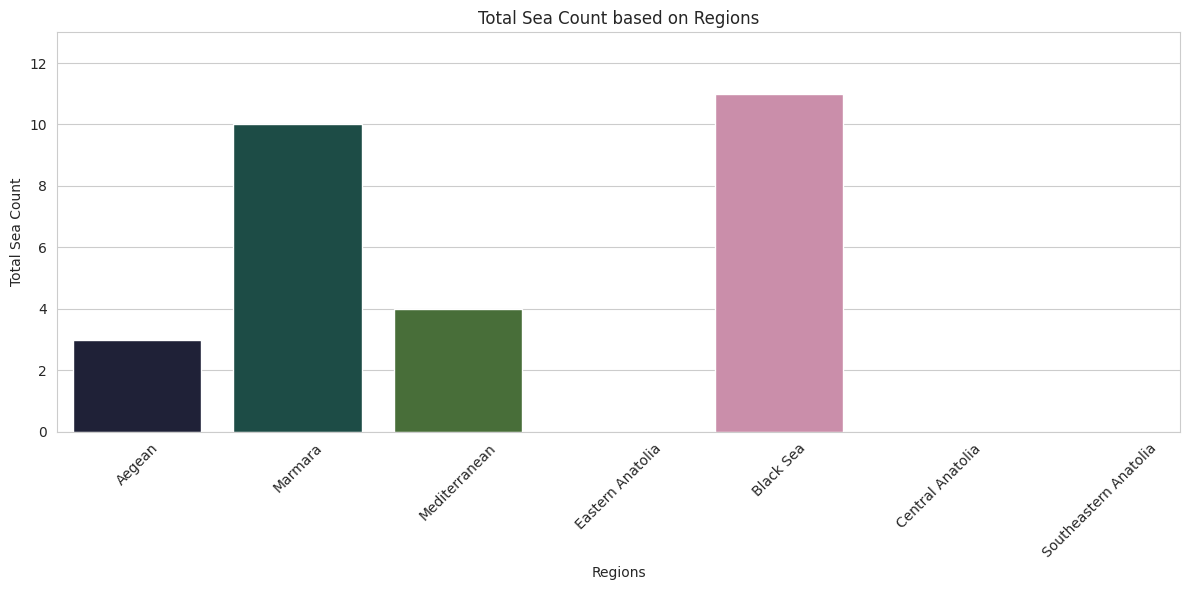

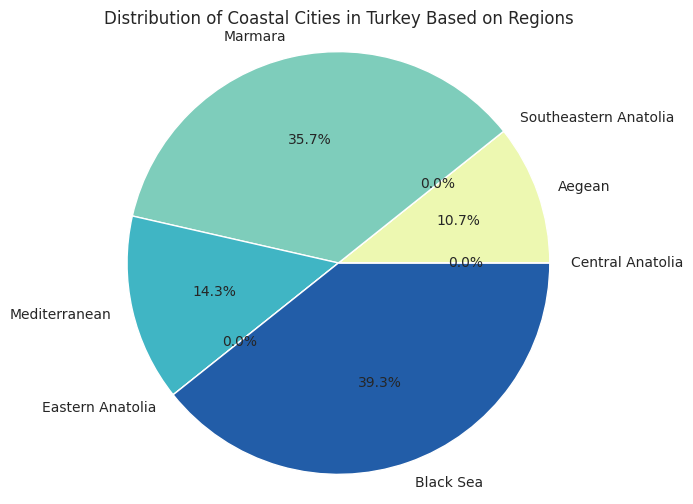

In [7]:
aegon_sea_count = 0
marmara_sea_count = 0
medi_sea_count = 0
black_sea_count = 0
central_a_sea_count = 0
east_a_sea_count = 0
southeast_a_sea_count = 0

for index, row in city_data.iterrows():
    if row['Region'] == "Aegean":
        aegon_sea_count += row['Sea']
    elif row['Region'] == "Marmara":
        marmara_sea_count += row['Sea']
    elif row['Region'] == "Mediterranean":
        medi_sea_count += row['Sea']
    elif row['Region'] == "Eastern Anatolia":
        east_a_sea_count += row['Sea']
    elif row['Region'] == "Black Sea":
        black_sea_count += row['Sea']
    elif row['Region'] == "Central Anatolia":
        central_a_sea_count += row['Sea']
    elif row['Region'] == "Southeastern Anatolia":
        southeast_a_sea_count += row['Sea']

# New DataFrame for Regions
region_list = [
    "Aegean", "Marmara", "Mediterranean", "Eastern Anatolia",
    "Black Sea", "Central Anatolia", "Southeastern Anatolia"
]

# New DataFrame for Sea Values
sea_values = [
    aegon_sea_count, marmara_sea_count, medi_sea_count, east_a_sea_count,
    black_sea_count, central_a_sea_count, southeast_a_sea_count
]

sea_df = pd.DataFrame({
    "Region": region_list,
    "Sea": sea_values
})

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Bar chart
sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")

plt.title("Total Sea Count based on Regions")
plt.xticks(rotation=45)
plt.ylabel("Total Sea Count")
plt.xlabel("Regions")
plt.tight_layout()
plt.ylim(0,13)
plt.show()

# Changing the DataFrames to make it seen in pie chart
region_list = [
    "Aegean", "Southeastern Anatolia", "Marmara", "Mediterranean", "Eastern Anatolia",
    "Black Sea", "Central Anatolia"
]
sea_values = [
    aegon_sea_count, southeast_a_sea_count, marmara_sea_count, medi_sea_count, east_a_sea_count,
    black_sea_count, central_a_sea_count
]
sea_df = pd.DataFrame({
    "Region": region_list,
    "Sea": sea_values
})

print(" ")
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    sea_df['Sea'],
    labels=sea_df['Region'],
    autopct='%1.1f%%',
    colors=sns.color_palette("YlGnBu", len(sea_df))
)
plt.title('Distribution of Coastal Cities in Turkey Based on Regions')
plt.axis('equal')
plt.show()


**1. Hypothesis**

-> Combining Regions' Socioeconomic Status with Regions' Obesity Rate

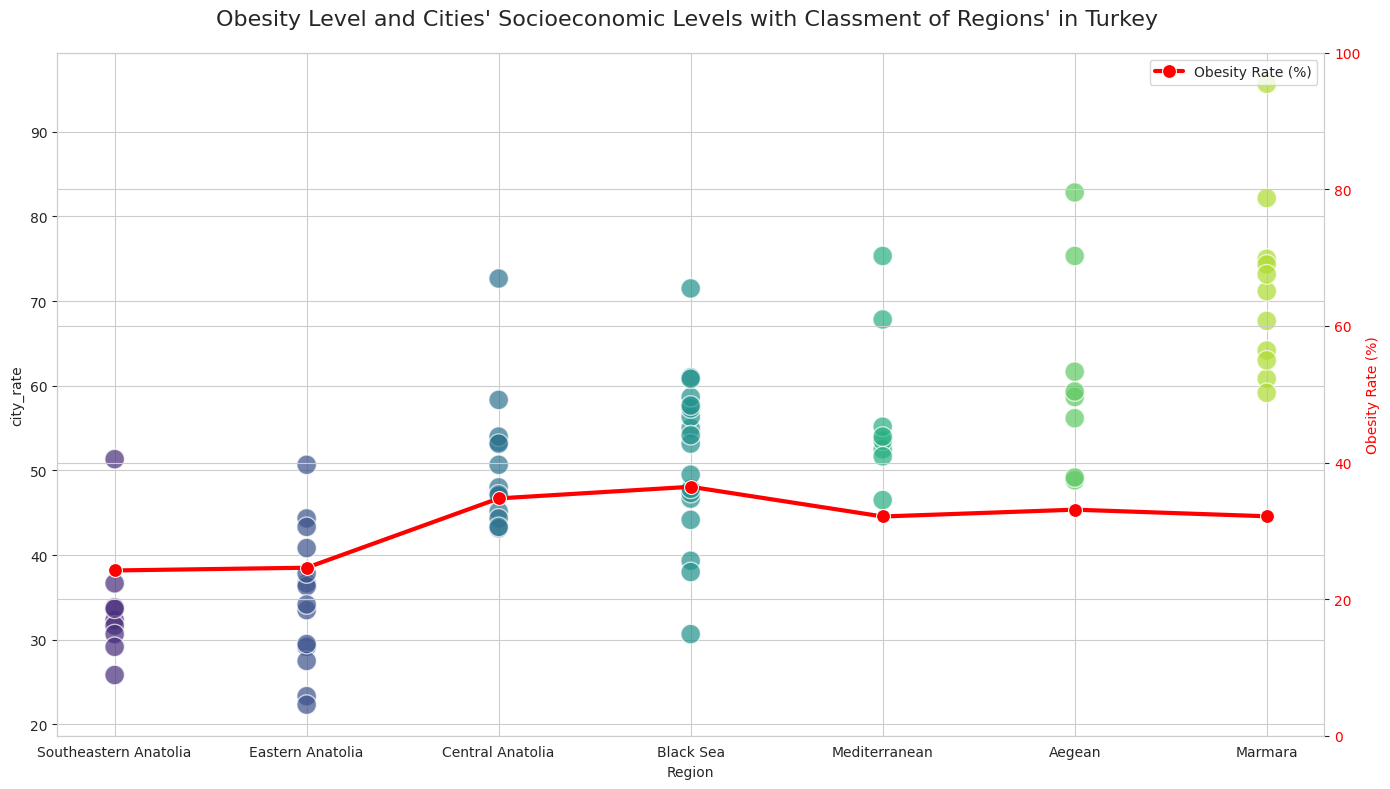

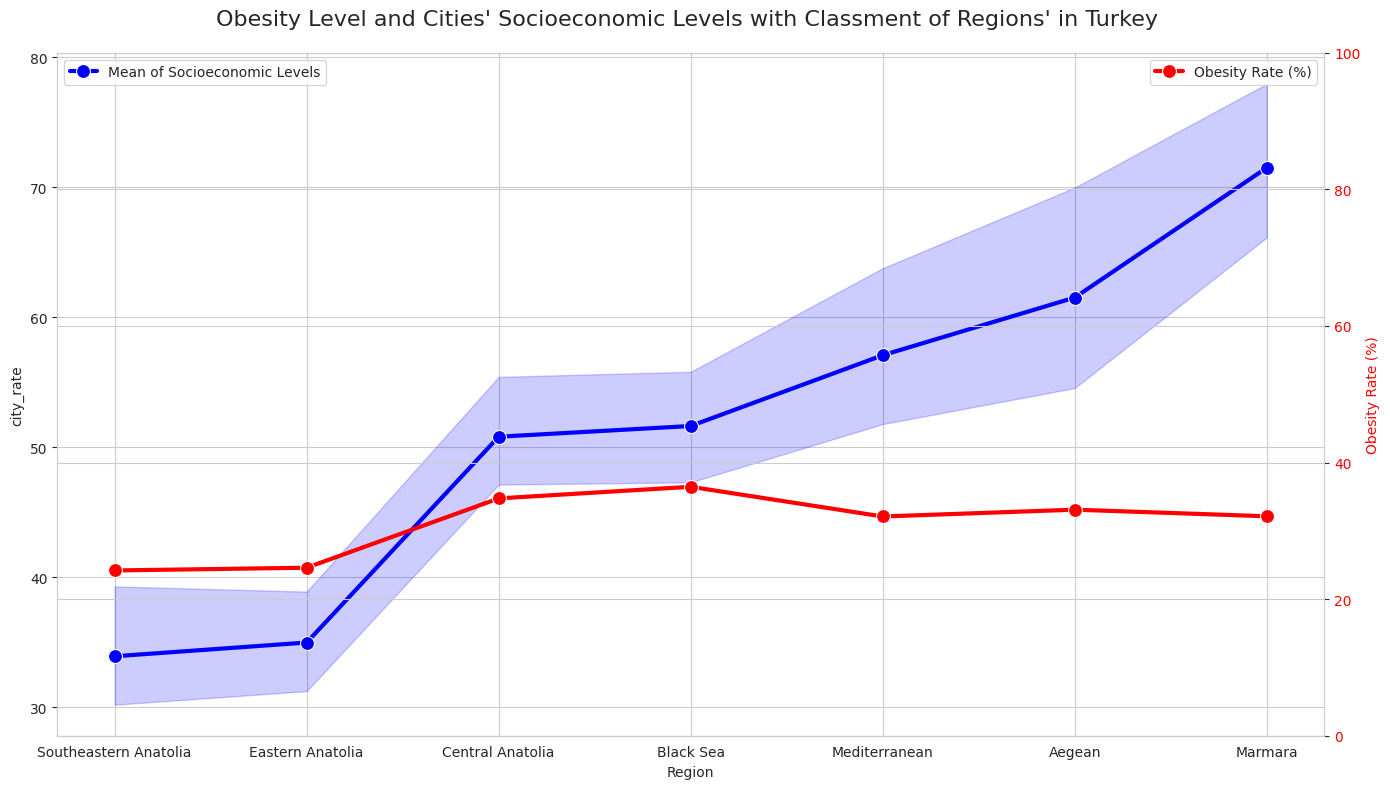

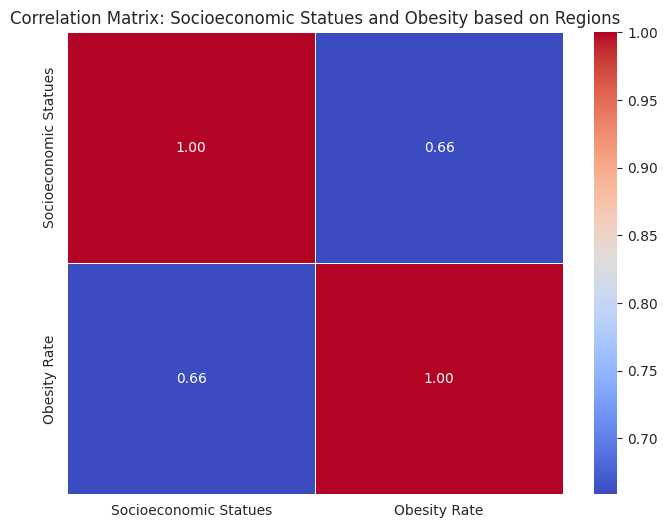

In [8]:
obesity_data.rename(columns={"Rate": "obesity_rate"}, inplace=True)
region_data.rename(columns={"Rate": "region_socio_rate"}, inplace=True)
city_data.rename(columns={"RATE": "city_rate"}, inplace=True)

socioR_obesity_data = pd.merge(obesity_data, city_data, on="Region")
city_region_data = pd.merge(socioR_obesity_data, region_data, on="Region")
city_region_data = city_region_data.sort_values(by='region_socio_rate')


# Scatter plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
# Data of Cities with grouping by regions
sns.scatterplot(
    data=city_region_data,
    x='Region',
    y='city_rate',
    hue='Region',
    palette='viridis',
    s=200,
    alpha=0.7,
    linewidth=1,
    legend=False
)
# Line of Obesity Level
ax2 = plt.twinx()
sns.lineplot(
    data=socioR_obesity_data[['Region', 'obesity_rate']],
    x='Region',
    y='obesity_rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
    ax=ax2,
    label='Obesity Rate (%)'
)
plt.title('Obesity Level and Cities\' Socioeconomic Levels with Classment of Regions\' in Turkey ' , fontsize=16, pad=20)
plt.xlabel('Regions')
plt.ylabel('Socioeconomic Level Rates (%)')
ax2.set_ylabel('Obesity Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.ylim(0,100)
plt.tight_layout()
plt.show()

print(" ")
# Lineplot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Line of Means of Regions' Socioeconomic Levels
sns.lineplot(
    data=city_region_data,
    x='Region',
    y='city_rate',
    color='blue',
    marker='o',
    linewidth=3,
    markersize=10,
    label='Mean of Socioeconomic Levels'
)

# Line of Obesity Level
ax2 = plt.twinx()
sns.lineplot(
    data=socioR_obesity_data[['Region', 'obesity_rate']],
    x='Region',
    y='obesity_rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
    ax=ax2,
    label='Obesity Rate (%)'
)
plt.title('Obesity Level and Cities\' Socioeconomic Levels with Classment of Regions\' in Turkey ' , fontsize=16, pad=20)
plt.xlabel('Regions')
plt.ylabel('Socioeconomic Level Rates (%)')
ax2.set_ylabel('Obesity Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.ylim(0,100)
plt.tight_layout()
plt.show()

print(" ")
# Pearson Correlation
correlation = city_region_data[['region_socio_rate', 'obesity_rate']].corr(method='pearson')

# Heatmap for Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, xticklabels=['Socioeconomic Statues', 'Obesity Rate'],
            yticklabels=['Socioeconomic Statues', 'Obesity Rate'])
plt.title('Correlation Matrix: Socioeconomic Statues and Obesity based on Regions')
plt.show()


**2. Hypothesis**

-> Combining Regions' coastality with Regions' Obesity Rate

<ipython-input-9-a85e58a18caa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")


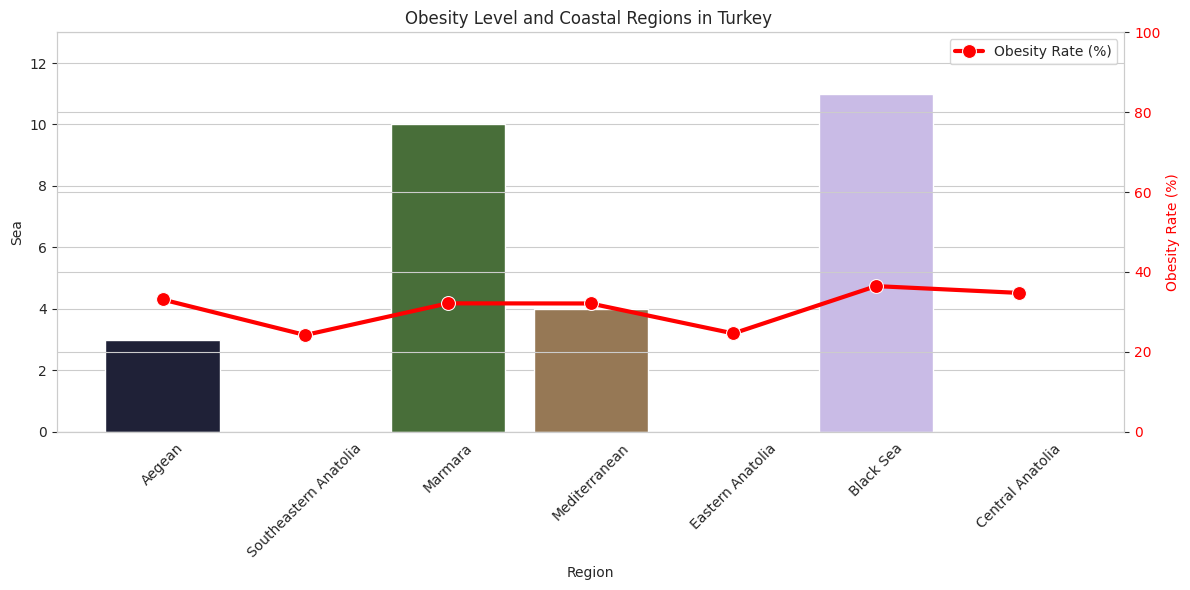

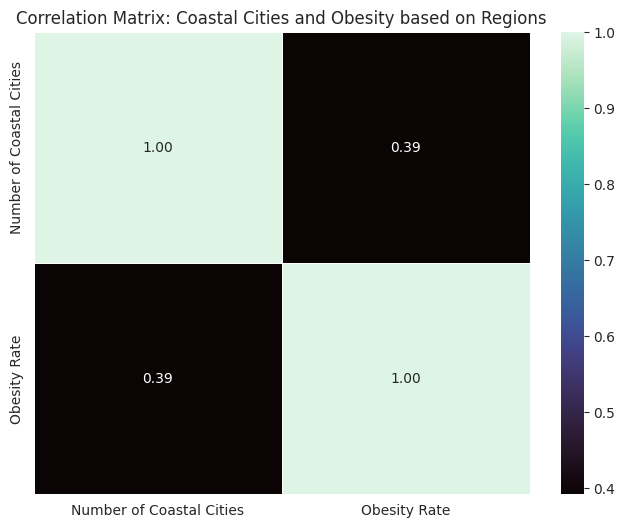

In [9]:
# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylim(0,13)

# Line of Obesity Level
ax2 = plt.twinx()
sns.lineplot(
    data=socioR_obesity_data[['Region', 'obesity_rate']],
    x='Region',
    y='obesity_rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
    ax=ax2,
    label='Obesity Rate (%)'
)
plt.title('Obesity Level and Coastal Regions in Turkey ')
plt.xlabel('Regions')
plt.ylabel('Total Sea Count')
ax2.set_ylabel('Obesity Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.ylim(0,100)
plt.tight_layout()
plt.show()

print(" ")
# Pearson Correlation
correlation = city_region_data[['Sea', 'obesity_rate']].corr(method='pearson')

# Heatmap for Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='mako', fmt=".2f", linewidths=0.5, xticklabels=['Number of Coastal Cities', 'Obesity Rate'],
            yticklabels=['Number of Coastal Cities', 'Obesity Rate'])
plt.title('Correlation Matrix: Coastal Cities and Obesity based on Regions')
plt.show()

**3. Hypothesis**

-> Combining Regions' Costality with Socioeconomic Statues

<ipython-input-10-8d2cedf2047a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=city_data, palette='cividis')


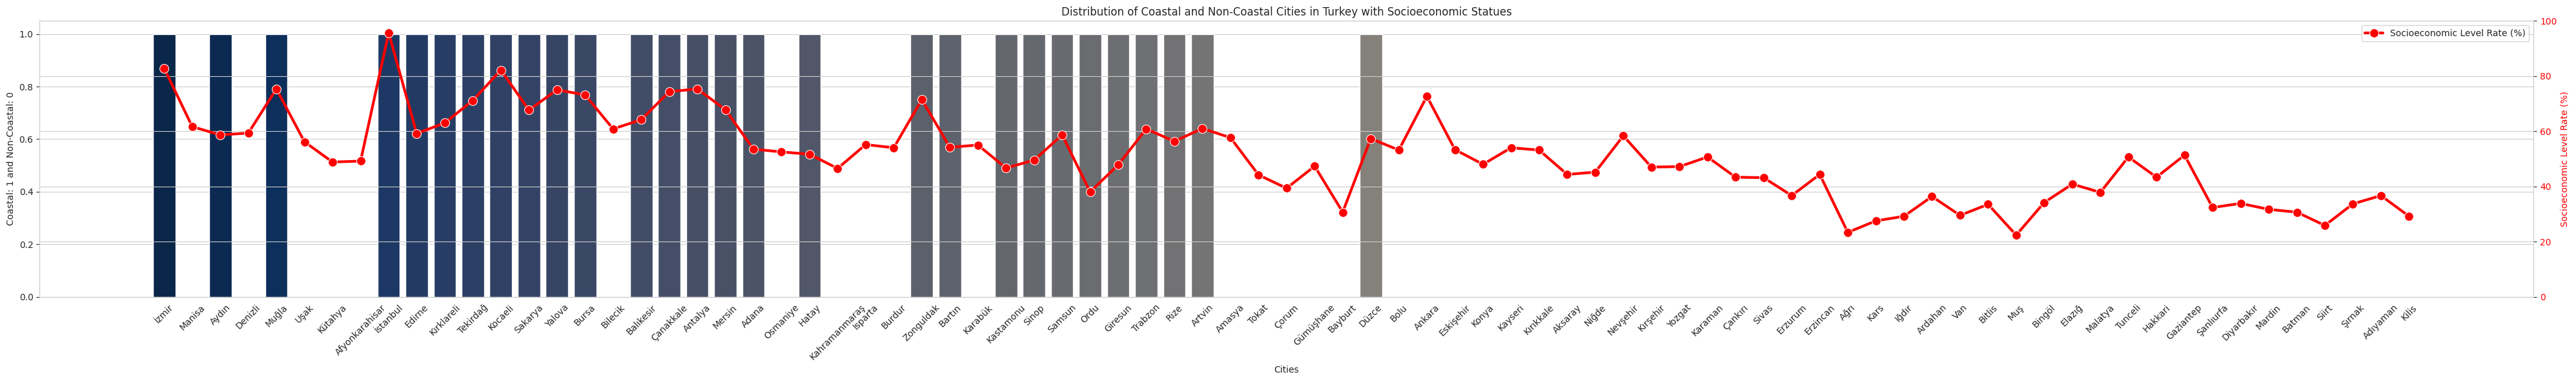

In [10]:
# Coastal Cities with Socioeconomic Statues

# Bar Chart
plt.figure(figsize=(40, 6))
sns.barplot(x='City', y='Sea', data=city_data, palette='cividis')

plt.xlabel("Cities")
plt.ylabel("Coastal: 1 and Non-Coastal: 0")
plt.xticks(rotation=45)

# Line of Socioeconomic Level
ax2 = plt.twinx()
sns.lineplot(
    data=city_data[['City', 'city_rate']],
    x='City',
    y='city_rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
    ax=ax2,
    label='Socioeconomic Level Rate (%)'
)
plt.title("Distribution of Coastal and Non-Coastal Cities in Turkey with Socioeconomic Statues")
plt.xlabel('City')
plt.ylabel('Sea')

ax2.set_ylabel('Socioeconomic Level Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


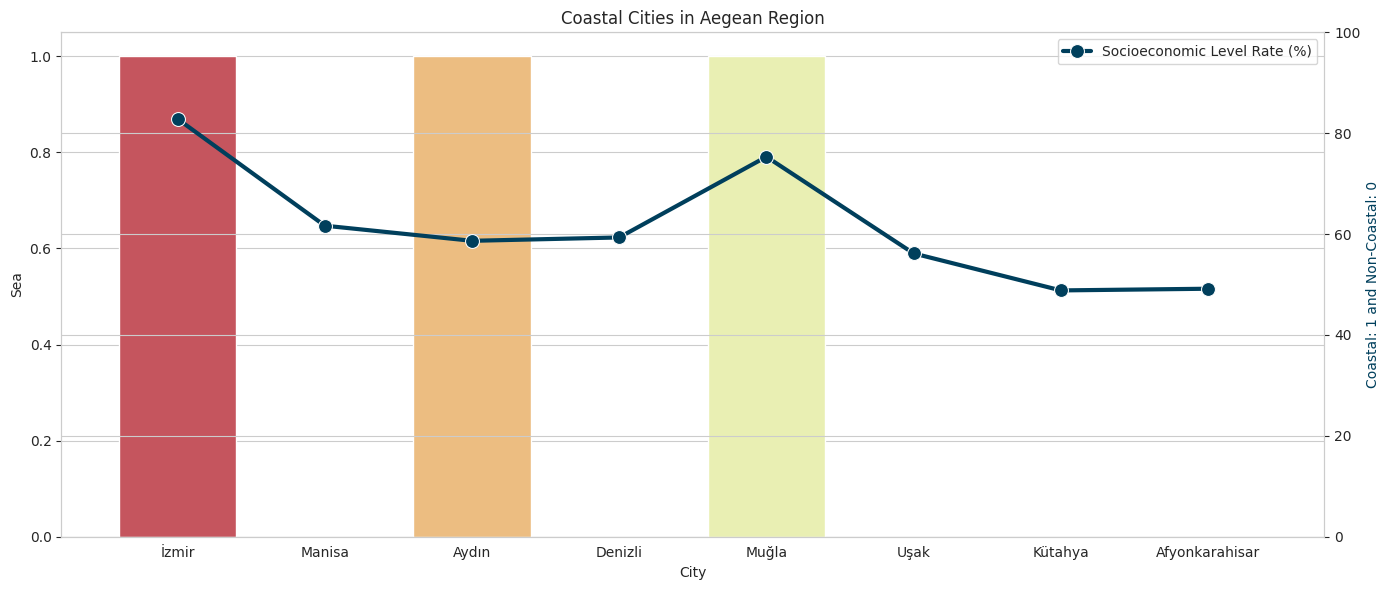

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


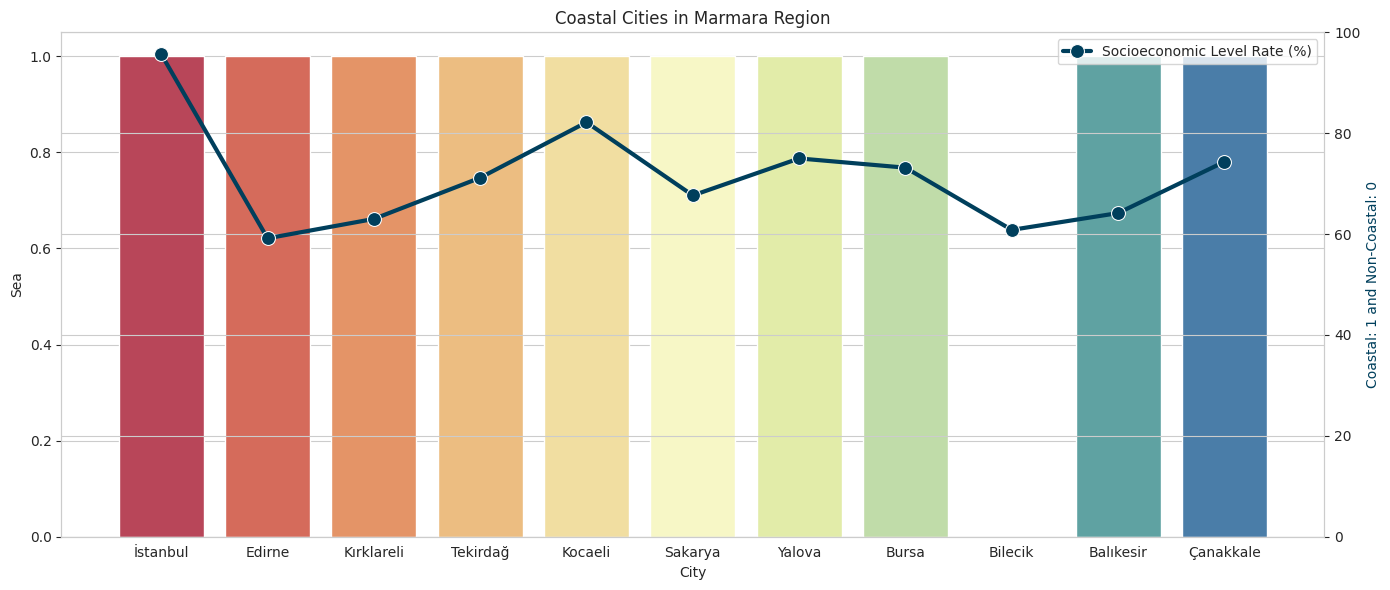

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


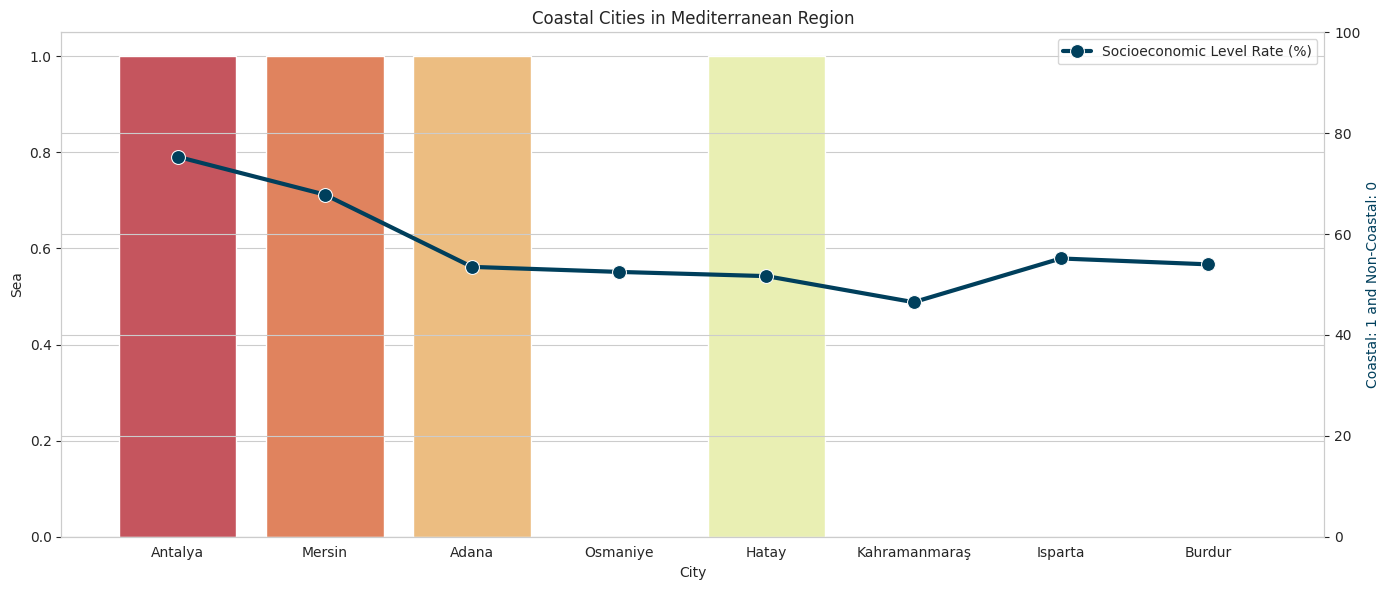

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


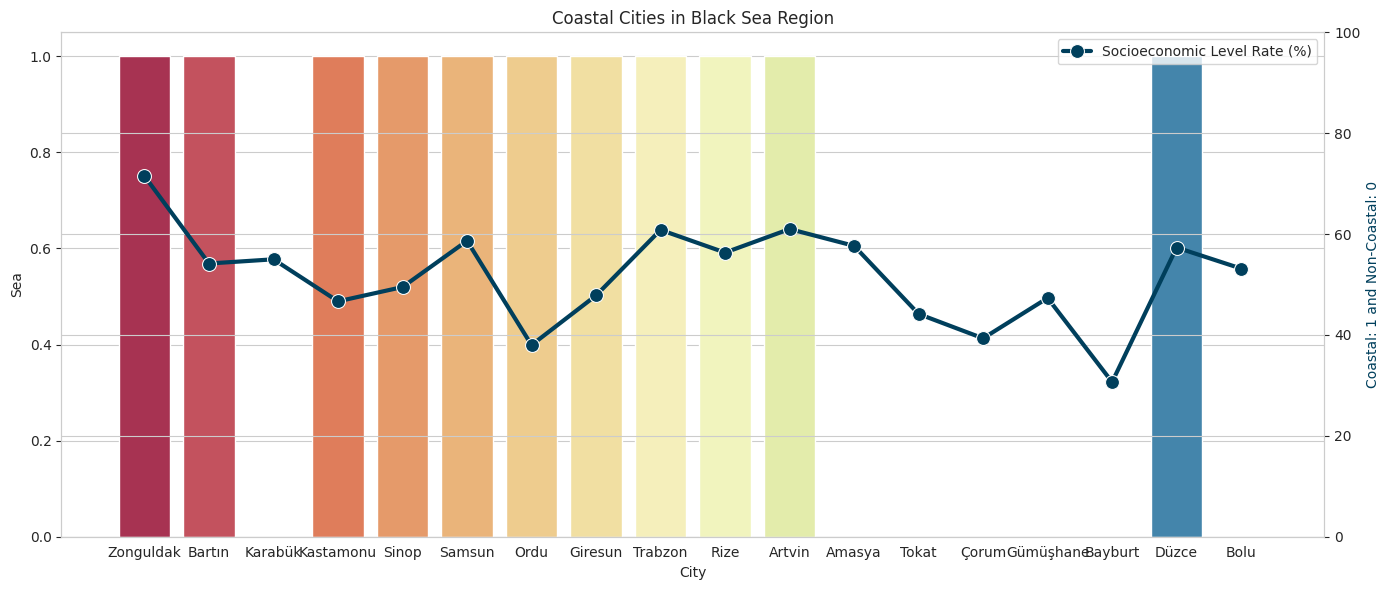

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


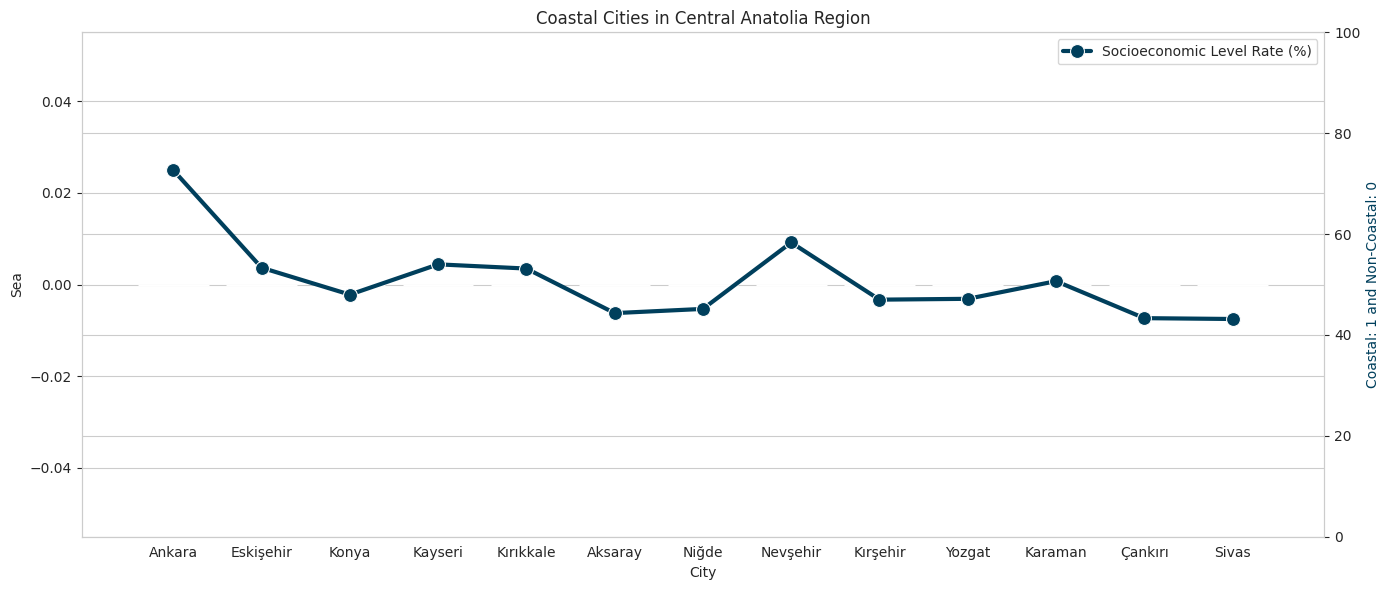

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


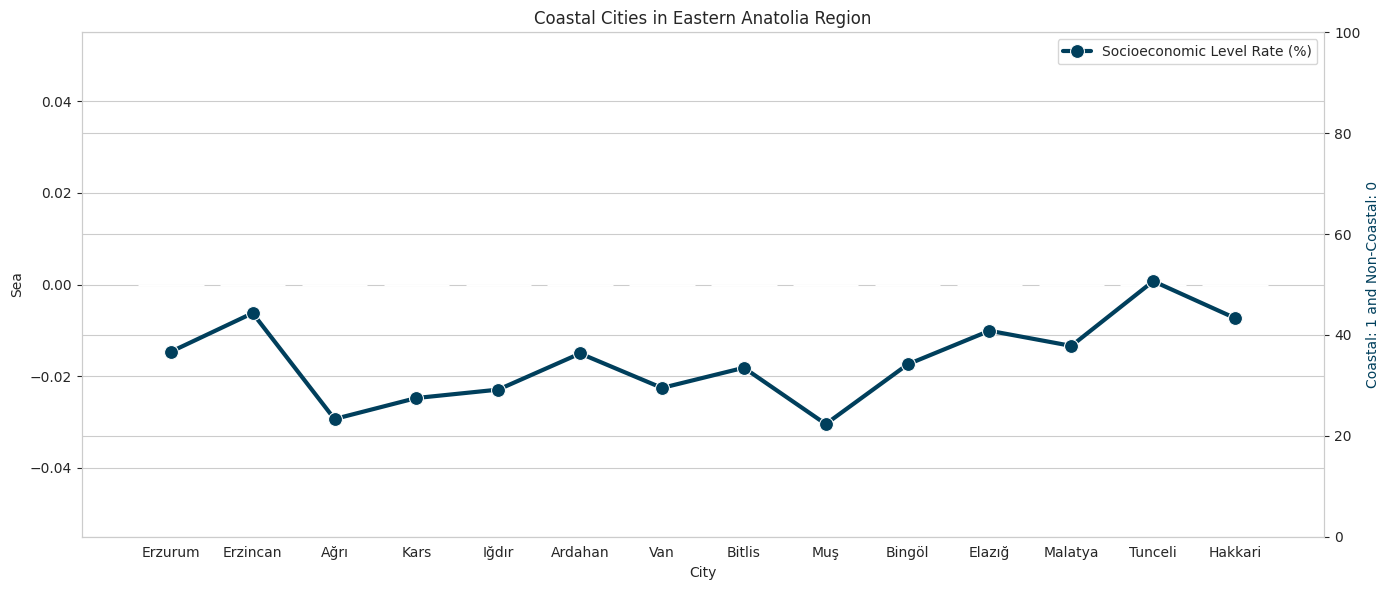

<ipython-input-11-7981b9cb5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')


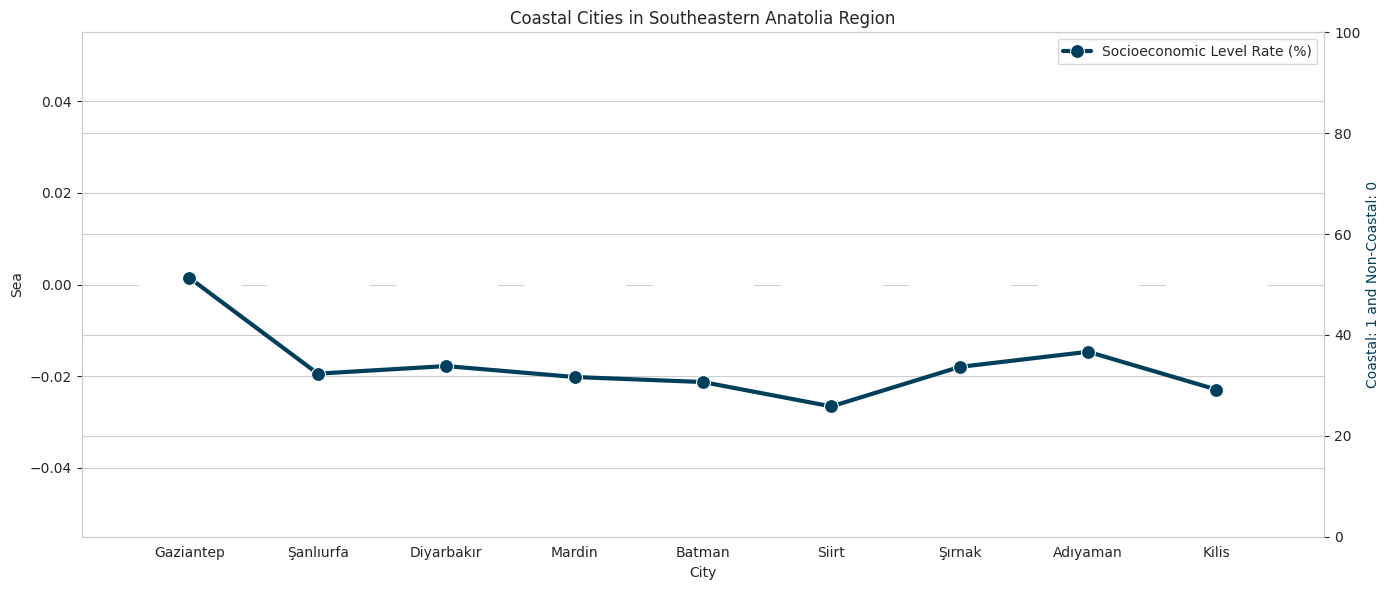

In [11]:
# Coastal Cities with Socioeconomic Statues by Regions

regions = city_data['Region'].unique()

# Bar Chart for every region
for region in regions:
    plt.figure(figsize=(14, 6))
    region_df = city_data[city_data['Region'] == region]
    sns.barplot(x='City', y='Sea', data=region_df, palette='Spectral')

    # Line of Socioeconomic Level
    ax2 = plt.twinx()
    sns.lineplot(
        data=region_df[['City', 'city_rate']],
        x='City',
        y='city_rate',
        color='#003f5c',
        marker='o',
        linewidth=3,
        markersize=10,
        ax=ax2,
        label='Socioeconomic Level Rate (%)'

    )

    plt.title(f'Coastal Cities in {region} Region')
    plt.xlabel("Cities")
    plt.ylabel("Coastal: 1 and Non-Coastal: 0", color='#003f5c')
    plt.ylim(0, 1.2)
    ax2.set_ylim(0,100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(" ")



<ipython-input-12-4e117b26a344>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")


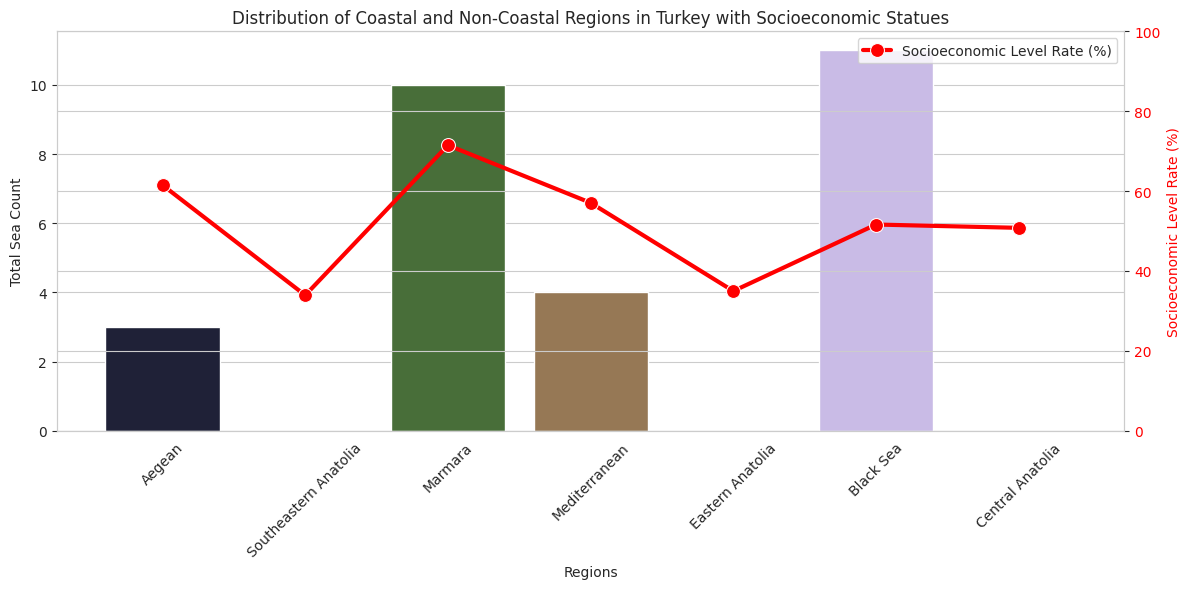

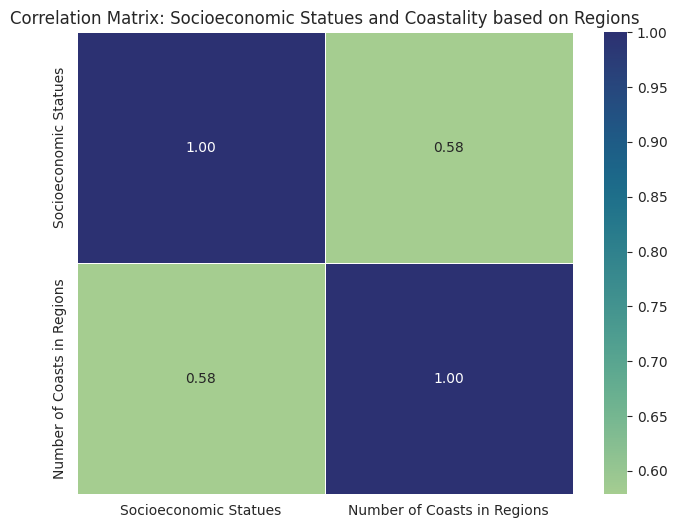

In [12]:
# Coastal Regions with Socioeconomic Statues

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Bar chart
sns.barplot(data=sea_df, x="Region", y="Sea", palette="cubehelix")
plt.xticks(rotation=45)
plt.ylabel("Total Sea Count")
plt.xlabel("Regions")
plt.tight_layout()

# Line of Socioeconomic Level
ax2 = plt.twinx()
sns.lineplot(
    data=region_data[['Region', 'region_socio_rate']],
    x='Region',
    y='region_socio_rate',
    color='red',
    marker='o',
    linewidth=3,
    markersize=10,
    ax=ax2,
    label='Socioeconomic Level Rate (%)'
)
plt.title("Distribution of Coastal and Non-Coastal Regions in Turkey with Socioeconomic Statues")
plt.xlabel('Regions')
plt.ylabel('Sea')

ax2.set_ylabel('Socioeconomic Level Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print(" ")
# Pearson Correlation
correlation = city_region_data[['region_socio_rate', 'Sea']].corr(method='pearson')

# Heatmap for Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='crest', fmt=".2f", linewidths=0.5, xticklabels=['Socioeconomic Statues', 'Number of Coasts in Regions'],
            yticklabels=['Socioeconomic Statues', 'Number of Coasts in Regions'])
plt.title('Correlation Matrix: Socioeconomic Statues and Coastality based on Regions')
plt.show()

In [13]:
# Socioeconomic Status vs Obesity

# Pearson Correlation:
r, p_value = pearsonr(city_region_data['city_rate'], city_region_data['obesity_rate'])
print(f"Pearson r: {r:.2f}, p-value: {p_value:.4f}")

# Mann-Whitney U Test:
median_socio = city_region_data['city_rate'].median()
high_group = city_region_data[city_region_data['city_rate'] >= median_socio]['obesity_rate']
low_group = city_region_data[city_region_data['city_rate'] < median_socio]['obesity_rate']

stat, p_value = mannwhitneyu(high_group, low_group)
print(f"Mann-Whitney U: {stat:.2f}, p-value: {p_value:.4f}")

print(" ")

# Socioeconomic Status vs Coastal Regions

# Pearson Correlation:
r, p_value = pearsonr(city_data['city_rate'], city_data['Sea'])
print(f"Pearson r: {r:.2f}, p-value: {p_value:.4f}")

# Mann-Whitney U Test:
coastal = city_data[city_data['Sea'] == 1]['city_rate']
non_coastal = city_data[city_data['Sea'] == 0]['city_rate']

stat, p_value = mannwhitneyu(coastal, non_coastal)
print(f"Mann-Whitney U: {stat:.2f}, p-value: {p_value:.4f}")

print(" ")

# Obesity vs Coastal Regions

# Pearson Correlation:
r, p_value = pearsonr(city_region_data['obesity_rate'], city_region_data['Sea'])
print(f"Pearson r: {r:.2f}, p-value: {p_value:.4f}")

# Mann-Whitney U Test:
coastal = city_region_data[city_region_data['Sea'] == 1]['obesity_rate']
non_coastal = city_region_data[city_region_data['Sea'] == 0]['obesity_rate']

stat, p_value = mannwhitneyu(coastal, non_coastal)
print(f"Mann-Whitney U: {stat:.2f}, p-value: {p_value:.4f}")



Pearson r: 0.53, p-value: 0.0000
Mann-Whitney U: 1064.00, p-value: 0.0192
 
Pearson r: 0.63, p-value: 0.0000
Mann-Whitney U: 1317.50, p-value: 0.0000
 
Pearson r: 0.39, p-value: 0.0003
Mann-Whitney U: 1011.00, p-value: 0.0069


## Machine Learning
**Regression:** Predicting Obesity Rate

**Goal:** Predict obesity rate using the socioeconomic status.


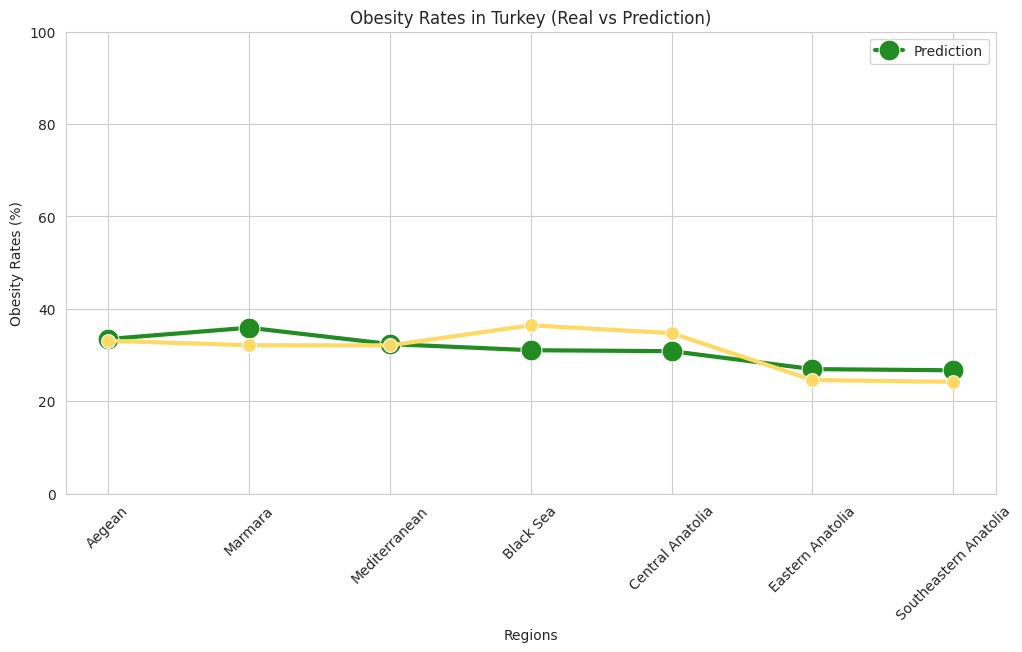

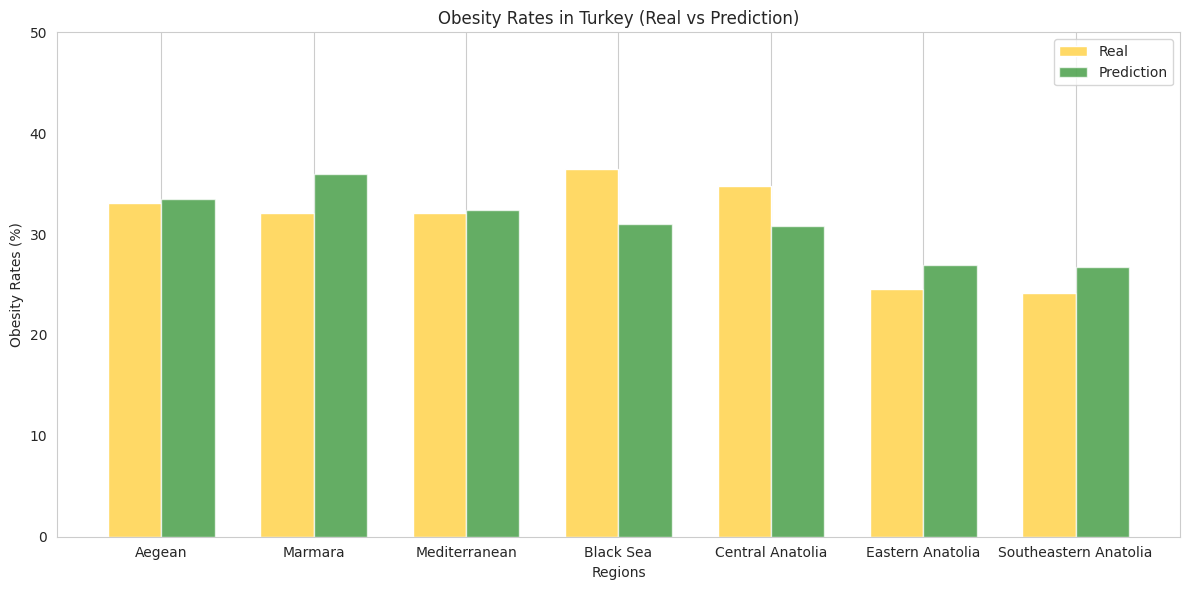

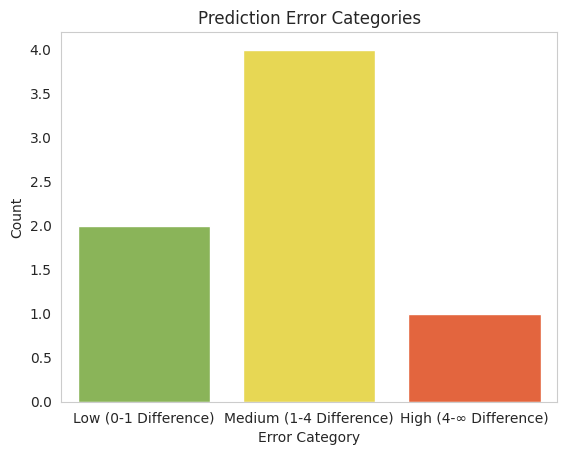

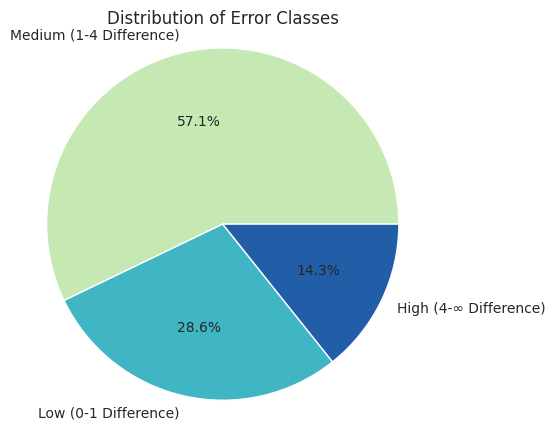

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

obesity_data = pd.read_csv("/content/Region_Obesity_Level_.csv", delimiter=';')
region_SES_data = pd.read_csv("/content/TheR_Regions_Rate_Last.csv", delimiter=';', decimal=".")

obesity_data.rename(columns={"Rate": "obesity_rate"}, inplace=True)
region_SES_data.rename(columns={"Rate": "SES_rate"}, inplace=True)

merged = pd.merge(obesity_data, region_SES_data, on="Region")

X = merged[["SES_rate"]]
y = merged["obesity_rate"]

model = LinearRegression()
model.fit(X, y)

y_obesity_prediction = model.predict(X)

# Lineplot
plt.figure(figsize=(12, 6))
plt.title("Obesity Rates in Turkey (Line Plot)")
plt.xlabel("Regions")
plt.ylabel("Obesity Rates (%)")
plt.grid(True)
plt.ylim(0,100)

regions = merged["Region"]
sns.lineplot(x=regions, y=y_obesity_prediction, color='#228B22', marker='o',linewidth=3, markersize=15, label="Prediction")

sns.lineplot(
    data=merged[['Region', 'obesity_rate']],
    x='Region',
    y='obesity_rate',
    color='#FFD966',
    marker='o',
    linewidth=3,
    markersize=10,
)

plt.title("Obesity Rates in Turkey (Real vs Prediction)")
plt.xlabel("Regions")
plt.ylabel("Obesity Rates (%)")
plt.grid(True)
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45)
plt.show()

print(" ")
# Bar Chart
plt.figure(figsize=(12, 6))
x = np.arange(len(regions))
width = 0.35

plt.bar(x - width/2, merged["obesity_rate"], width, label="Real", color='#FFD966')

plt.bar(x + width/2, y_obesity_prediction, width, label="Prediction", color='#228B22', alpha=0.7)

plt.xticks(x, regions)
plt.xlabel("Regions")
plt.ylabel("Obesity Rates (%)")
plt.title("Obesity Rates in Turkey (Real vs Prediction)")
plt.ylim(0, 50)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(" ")
#Bar Chart About Errors
error_classes = []

for i in range(len(merged['Region'])):
  difference = abs(merged['obesity_rate'][i] - y_obesity_prediction[i])
  if 0 <= difference <= 1:
    error_classes.append("Low (0-1 Difference)")
  elif 1 < difference <= 4:
    error_classes.append("Medium (1-4 Difference)")
  else:
    error_classes.append("High (4-∞ Difference)")

import seaborn as sns
import pandas as pd

error_df = pd.DataFrame({'Error Class': error_classes})
sns.countplot(data=error_df, x='Error Class', palette=["#8BC34A", "#FFEB3B", "#FF5722"])
plt.title("Prediction Error Categories")
plt.xlabel("Error Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

print(" ")
# Pie Chart About Errors
error_counts = error_df['Error Class'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    error_counts.values,
    labels=error_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("YlGnBu", len(error_counts))
)
plt.title('Distribution of Error Classes')
plt.axis('equal')
plt.show()



**KNN Model:** Predicting Obesity Rate

**Goal:** Predict obesity rate using the socioeconomic status.

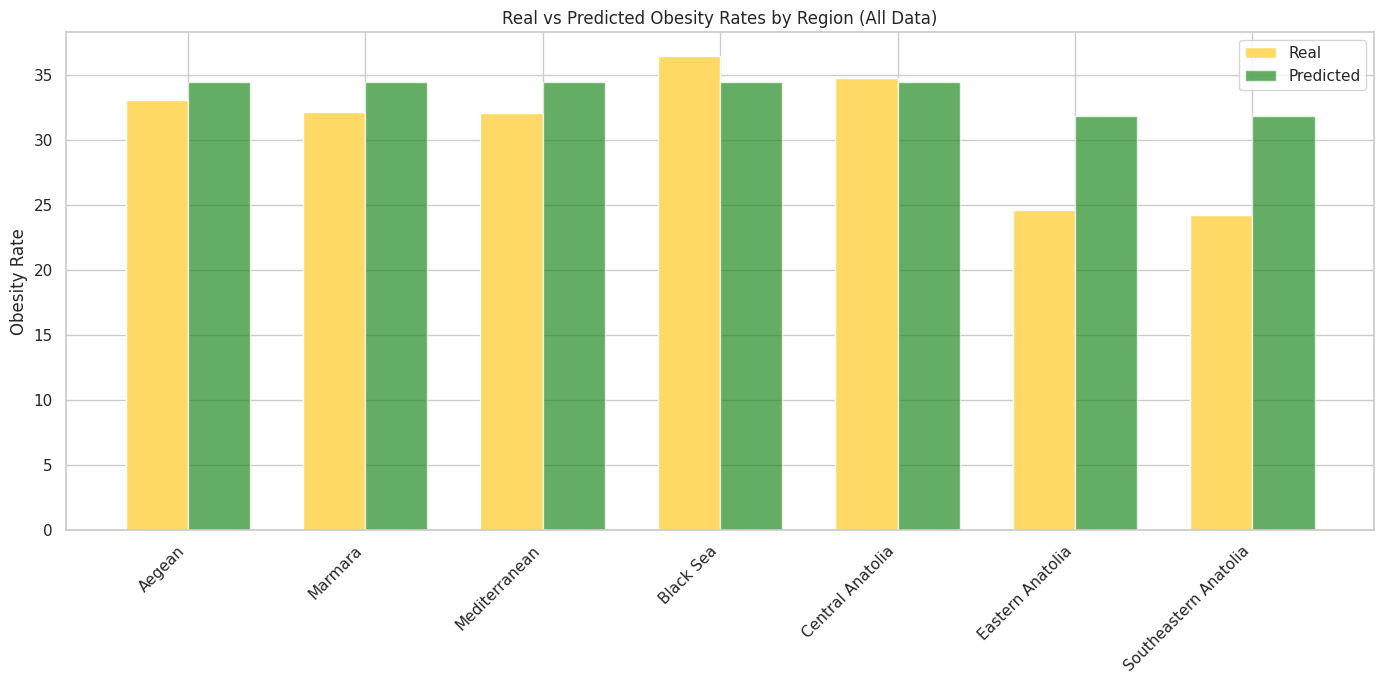

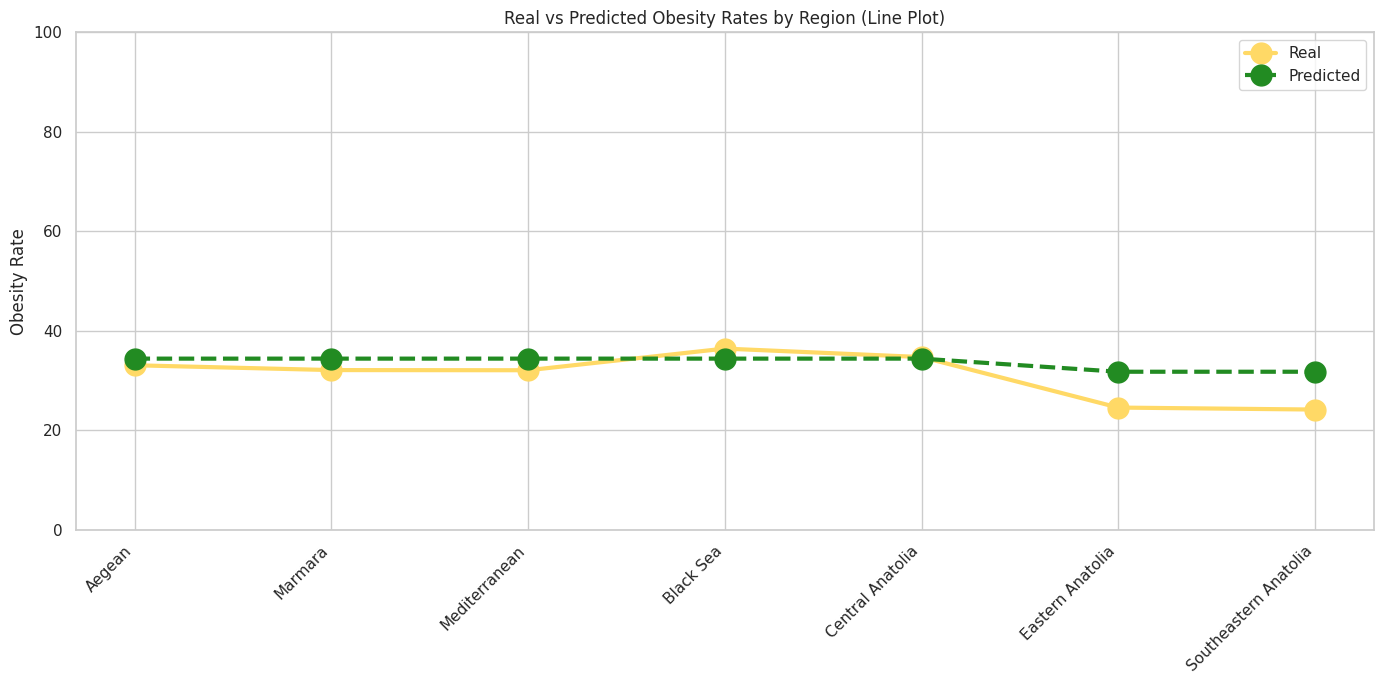

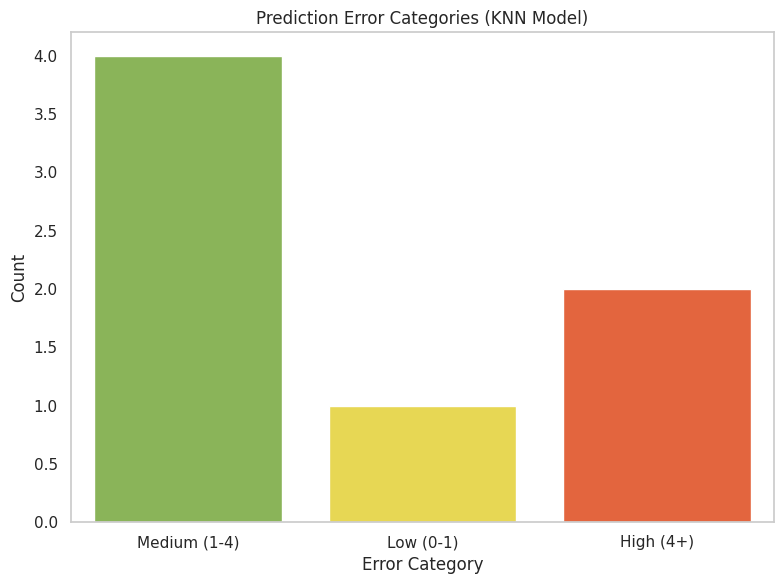

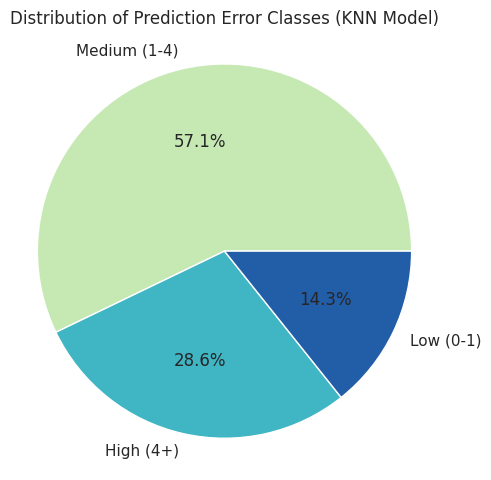

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

obesity_data = pd.read_csv("/content/Region_Obesity_Level_.csv", delimiter=';')
region_SES_data = pd.read_csv("/content/TheR_Regions_Rate_Last.csv", delimiter=';', decimal='.')

obesity_data.rename(columns={"Rate": "obesity_rate"}, inplace=True)
region_SES_data.rename(columns={"Rate": "SES_rate"}, inplace=True)

#Bar Chart
regions = merged["Region"].values
x_pos = np.arange(len(regions))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x_pos - width/2, y, width, label='Real', color='#FFD966')
plt.bar(x_pos + width/2, y_pred_full, width, label='Predicted', color='#228B22', alpha=0.7)

plt.xticks(x_pos, regions, rotation=45, ha='right')
plt.ylabel('Obesity Rate')
plt.title('Real vs Predicted Obesity Rates by Region (All Data)')
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

#Line Plot
plt.figure(figsize=(14,7))
plt.plot(regions, y, marker='o', linestyle='-', color='#FFD966',linewidth=3, markersize=15, label='Real')
plt.plot(regions, y_pred_full, marker='o', linestyle='--', color='#228B22',linewidth=3, markersize=15, label='Predicted')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Obesity Rate')
plt.title('Real vs Predicted Obesity Rates by Region (Line Plot)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

#Bar Chart About Errors
error_classes_knn = []

for i in range(len(y)):
    difference = abs(y[i] - y_pred_full[i])
    if 0 <= difference <= 1:
        error_classes_knn.append("Low (0-1)")
    elif 1 < difference <= 4:
        error_classes_knn.append("Medium (1-4)")
    else:
        error_classes_knn.append("High (4+)")

error_df_knn = pd.DataFrame({'Region': regions, 'Error Class': error_classes_knn})
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=error_df_knn, x='Error Class', palette=["#8BC34A", "#FFEB3B", "#FF5722"])
plt.title("Prediction Error Categories (KNN Model)")
plt.xlabel("Error Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(" ")

#Pie Chart Avout Errors
error_counts_knn = error_df_knn['Error Class'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    error_counts_knn.values,
    labels=error_counts_knn.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("YlGnBu", len(error_counts))
)
plt.title('Distribution of Prediction Error Classes (KNN Model)')
plt.axis('equal')
plt.tight_layout()
plt.show()
print(" ")




Linear Regression vs KNN Model

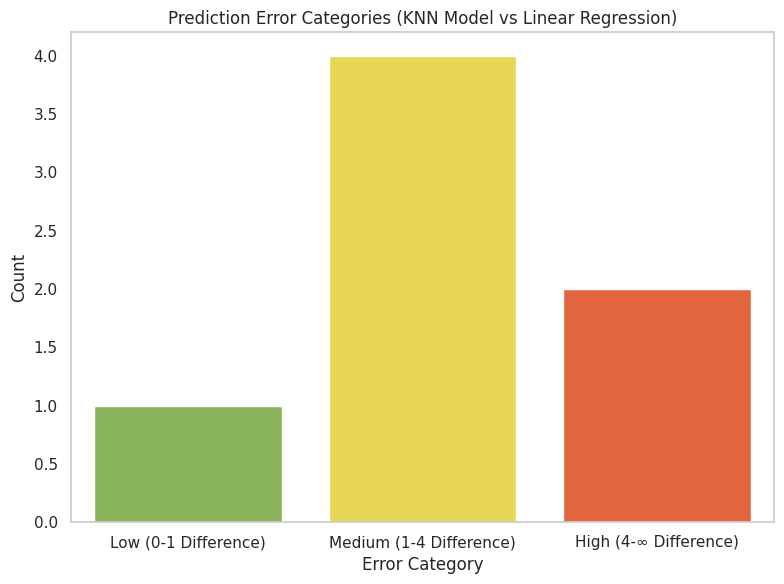

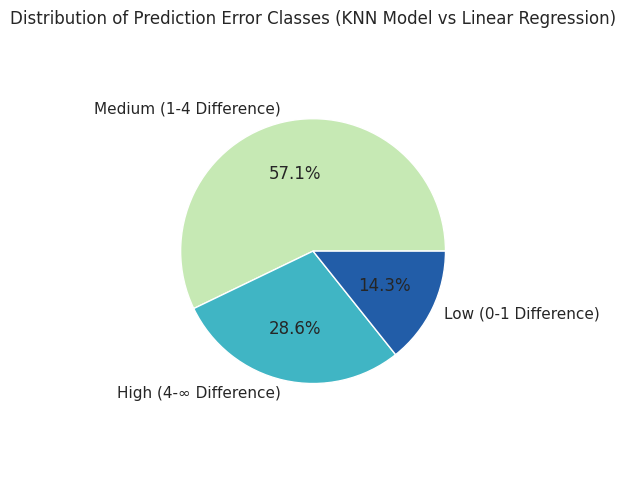

In [46]:
error_classes_both = []

for i in range(len(merged['Region'])):
    difference = abs(y_pred_full[i] - y_obesity_prediction[i])
    if 0 <= difference <= 1:
        error_classes_both.append("Low (0-1 Difference)")
    elif 1 < difference <= 4:
        error_classes_both.append("Medium (1-4 Difference)")
    else:
        error_classes_both.append("High (4-∞ Difference)")


# Bar Chart About Difference Between Linear Regression and KNN Model
error_df_both = pd.DataFrame({'Region': regions, 'Error Class': error_classes_both})
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=error_df_both, x='Error Class', palette=["#8BC34A", "#FFEB3B", "#FF5722"])
plt.title("Prediction Error Categories (KNN Model vs Linear Regression)")
plt.xlabel("Error Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(" ")

#Pie Chart Avout Errors
error_counts_both = error_df_both['Error Class'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    error_counts_both.values,
    labels=error_counts_both.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("YlGnBu", len(error_counts_both))
)
plt.title('Distribution of Prediction Error Classes (KNN Model vs Linear Regression)')
plt.axis('equal')
plt.tight_layout()
plt.show()
print(" ")
